# Downloading Required packages

In [87]:
import pandas
import numpy
import matplotlib
import seaborn
import scipy
import sklearn

In [88]:
from pydoc import help  # can type in the python console `help(name of function)` to get the documentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
from IPython.display import display, HTML

# figures inline in notebook
%matplotlib inline

np.set_printoptions(suppress=True)

DISPLAY_MAX_ROWS = 20  # number of max rows to print for a DataFrame
pd.set_option('display.max_rows', DISPLAY_MAX_ROWS)

In [89]:
data = pd.read_csv("/home/hs/dl160_bkp/perf_engg/cpu2017_results_20june.csv", header=None)
data.columns = ["V"+str(i) for i in range(1, len(data.columns)+1)]  # rename column names
data.V1 = data.V1.astype(str)
data.V2 = data.V2.astype(str)
data.V3 = data.V3.astype(str)
data.V4 = data.V4.astype(str)
data.V5 = data.V5.astype(str)
data.V6 = data.V6.astype(str)
data.V7 = data.V7.astype(str)
data.V8 = data.V8.astype(str)
data.V9 = data.V9.astype(str)

X = data.loc[1:, "V10":"V24"].astype(str).astype(float)  # independent variables data
y = data.V4  # dependednt variable data
Cname = data.V2
systemCat = data.V3
osCat = data.V7
compCat = data.V5
paralCat = data.V6
fsCat = data.V8
DrankCat = data.V9
data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,Benchmark,Hardware Vendor\t,System,Processor,Compiler,Parallelization,Operating System,File System,Dimm Rank,L1 in KB,...,Dimm Data Rate,dimm speed,Processor MHz,# Cores,# Chips,# Enabled Threads Per Core,SKU Cost(Pr),Base Result,Price Performance,Base Result * 1000
1,CINT2017,ASUSTeK Computer Inc.,ASUS RS700-E9(Z11PP-D24) Server System (2.10 G...,Intel Xeon Platinum 8176,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"Red Hat Enterprise Linux Server release 7.3, (...",xfs,2Rx4,32,...,2666,2400,2100,56,2,1,4708,9.3,1.97536,9300
2,CINT2017,ASUSTeK Computer Inc.,ASUS RS700-E9(Z11PP-D24) Server System (2.70 G...,Intel Xeon Gold 6150,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"Red Hat Enterprise Linux Server release 7.3, (...",xfs,2Rx4,32,...,2666,2400,2700,36,2,1,2091,8.87,4.24199,8870
3,CINT2017,ASUSTeK Computer Inc.,"ASUS WS C621E SAGE Server System (2.50 GHz, In...",Intel Xeon Platinum 8180,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 (x86_64) SP2, ...",btrfs,2Rx4,32,...,2666,2400,2500,56,2,1,3790,9.64,2.54354,9640
4,CINT2017,ASUSTeK Computer Inc.,"ASUS WS C621E SAGE Server System (3.00 GHz, In...",Intel Xeon Gold 6154,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 (x86_64) SP2, ...",btrfs,2Rx4,32,...,2666,2400,3000,36,2,1,7434,9.2,1.23756,9200
5,CINT2017,Cisco Systems,"Cisco UCS B200 M5 (Intel Xeon Bronze 3106, 1.7...",Intel Xeon Bronze 3106,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 SP2 (x86_64), ...",xfs,2Rx4,32,...,2666,2400,1700,16,2,1,7528,4.29,0.56987,4290
6,CINT2017,Cisco Systems,"Cisco UCS B200 M5 (Intel Xeon Gold 5115, 2.40 ...",Intel Xeon Gold 5115,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 SP2 (x86_64), ...",xfs,2Rx4,32,...,2666,2133,2400,20,2,1,9969,7.56,0.75835,7560
7,CINT2017,Cisco Systems,"Cisco UCS B200 M5 (Intel Xeon Gold 5118, 2.30GHz)",Intel Xeon Gold 5118,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 SP2 (x86_64), ...",xfs,2Rx4,32,...,2666,2400,2300,24,2,1,7102,7.62,1.07294,7620
8,CINT2017,Cisco Systems,"Cisco UCS B200 M5 (Intel Xeon Gold 5120, 2.20GHz)",Intel Xeon Gold 5120,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 SP2 (x86_64), ...",xfs,2Rx4,32,...,2666,2400,2200,28,2,1,12732,7.71,0.60556,7710
9,CINT2017,Cisco Systems,"Cisco UCS B200 M5 (Intel Xeon Gold 5120, 2.20GHz)",Intel Xeon Gold 5120,"C/C++: Version 18.0.0.128 of Intel C/C++, Comp...",Yes,"SUSE Linux Enterprise Server 12 SP2 (x86_64), ...",xfs,2Rx4,32,...,2666,2400,2200,28,2,1,5820,7.7,1.32302,7700


### Below we see the mean of all independent variables considered in the dataset

In [90]:
X.apply(np.mean)

V10       33.153700
V11      994.853890
V12    24773.464896
V13      491.961733
V14       27.649273
V15       21.675838
V16     2661.173308
V17     2338.052815
V18     2427.124605
V19       42.118912
V20        2.626502
V21        1.629981
V22     5051.696395
V23      144.456638
V24       48.712174
dtype: float64

### Below standard deviation is calculated for all X variables

In [91]:
X.apply(np.std)

V10        6.006093
V11      130.128850
V12    11869.560893
V13      594.089492
V14       23.700709
V15       21.250909
V16       38.471726
V17      692.413435
V18      515.389279
V19       46.348163
V20        1.912698
V21        0.720855
V22     3715.528640
V23      202.940177
V24       91.261483
dtype: float64

### Since the mean and standard deviation for the above variables is not comparable lets standardise it. 

### Means and standard deviations- segregating data w.r.t only HPE

In [92]:
class2data = data[Cname=="Hewlett Packard Enterprise"]

 ### Lets calculate the mean and standard deviations of the independent variables - HPE dataset

In [93]:
hpeData =class2data.loc[:, "V10":"V24"].astype(str).astype(float) 

In [94]:
hpeData.apply(np.mean)

V10       32.056042
V11      990.823117
V12    26020.091068
V13      298.602452
V14       30.802102
V15       14.472855
V16     2659.478109
V17     2338.714536
V18     2498.073555
V19       46.311734
V20        2.700525
V21        1.523643
V22     5309.542907
V23      158.704466
V24       49.878719
dtype: float64

In [95]:
hpeData.apply(np.std)

V10        1.337985
V11      139.029065
V12    11805.132143
V13      202.273084
V14       35.150032
V15       12.616694
V16       41.137429
V17      920.471567
V18      527.638696
V19       75.190878
V20        3.031588
V21        0.499441
V22     3705.868315
V23      326.431191
V24      127.948459
dtype: float64

In [96]:
# A function for calculating the mean and standard deviation for different groups
def printMeanAndSdByGroup(variables, groupvariable):
    data_groupby = variables.groupby(groupvariable)
    print("## Means:")
    display(data_groupby.apply(np.mean))
    print("\n## Standard deviations:")
    display(data_groupby.apply(np.std))
    print("\n## Sample sizes:")
    display(pd.DataFrame(data_groupby.apply(len)))

In [97]:
printMeanAndSdByGroup(X, Cname)

## Means:


,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V2,,,,,,,,,,,,,,,
ASUSTeK Computer Inc.,32.000000,950.857143,30415.238095,460.190476,17.904762,25.904762,2697.809524,2400.000000,2657.142857,42.476190,1.904762,1.619048,6190.095238,152.386190,45.965530
Cisco Systems,32.000000,1024.000000,24056.685714,465.502041,28.897959,16.130612,2666.000000,2283.391837,2510.612245,37.812245,2.408163,1.440816,4550.995918,123.689020,48.132005
Dell Inc.,34.305476,984.899135,24892.126801,306.585014,18.399135,19.550432,2664.463977,2330.628242,2410.951009,33.538905,2.256484,1.808357,5105.731988,121.973112,40.129252
Epsylon Sp. z o.o. Sp. Komandytowa,32.000000,1024.000000,17600.000000,362.666667,22.666667,16.000000,2666.000000,2400.000000,2658.333333,18.000000,2.000000,2.000000,3495.333333,96.741667,56.222297
Fujitsu,41.290323,825.806452,30459.870968,1348.000000,61.903226,22.193548,2571.612903,2136.258065,2885.483871,96.000000,5.500000,3.709677,4468.112903,490.939516,188.623439
H3C,32.000000,256.000000,20480.000000,256.000000,16.000000,16.000000,2400.000000,2400.000000,2100.000000,16.000000,2.000000,2.000000,5404.000000,64.750000,38.259530
Hewlett Packard Enterprise,32.056042,990.823117,26020.091068,298.602452,30.802102,14.472855,2659.478109,2338.714536,2498.073555,46.311734,2.700525,1.523643,5309.542907,158.704466,49.878719
Huawei,32.000000,1024.000000,23224.430108,408.774194,24.516129,16.344086,2666.000000,2331.096774,2520.788530,31.297491,2.071685,1.501792,5286.043011,114.158172,37.295685
IBM Corporation,64.000000,512.000000,122880.000000,256.000000,16.000000,16.000000,2666.000000,2400.000000,3400.000000,24.000000,2.000000,8.000000,2913.000000,213.000000,73.120490



## Standard deviations:


,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V2,,,,,,,,,,,,,,,
ASUSTeK Computer Inc.,0.000000,225.441426,9833.808631,219.375655,7.546079,7.769934,98.043537,0.000000,531.459293,15.686267,0.293544,0.485621,3515.002485,100.099611,64.008990
Cisco Systems,0.000000,0.000000,9255.719216,159.865546,9.853301,1.439700,0.000000,132.427021,493.353407,26.011878,0.821108,0.496485,3580.846835,114.516002,55.732523
Dell Inc.,8.274056,138.048393,13140.627677,213.758639,12.923207,12.444443,28.571680,1185.139254,503.212693,22.445465,0.765188,0.393593,3670.518410,98.610033,44.445344
Epsylon Sp. z o.o. Sp. Komandytowa,0.000000,0.000000,9205.994569,47.702784,2.981424,0.000000,0.000000,0.000000,572.215480,13.904436,0.000000,0.000000,3757.745930,57.176277,45.824969
Fujitsu,14.525158,273.639912,10253.667466,3073.131879,59.210317,9.247212,127.271535,739.284352,866.229645,93.853523,6.018118,2.749704,3937.658986,489.087172,301.170738
H3C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4628.000000,11.250000,30.683770
Hewlett Packard Enterprise,1.337985,139.029065,11805.132143,202.273084,35.150032,12.616694,41.137429,920.471567,527.638696,75.190878,3.031588,0.499441,3705.868315,326.431191,127.948459
Huawei,0.000000,0.000000,8130.727031,167.111072,3.481481,2.320987,0.000000,116.831104,550.527367,22.465131,0.557022,0.499997,3693.150827,117.201094,69.449189
IBM Corporation,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000



## Sample sizes:


,0
V2,
ASUSTeK Computer Inc.,21
Cisco Systems,245
Dell Inc.,694
Epsylon Sp. z o.o. Sp. Komandytowa,24
Fujitsu,62
H3C,2
Hewlett Packard Enterprise,571
Huawei,279
IBM Corporation,1


In [98]:
corrmat = hpeData.corr()
corrmat

,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24
V10,1.000000,-0.144255,0.140205,0.044189,-0.027171,0.164422,0.006640,0.002789,-0.023662,-0.007972,-0.023495,0.039950,-0.024928,-0.003555,-0.002513
V11,-0.144255,1.000000,-0.561862,0.156375,0.047280,-0.728193,0.587720,0.038334,0.115862,-0.076037,-0.033147,-0.169493,0.004462,-0.057482,-0.037095
V12,0.140205,-0.561862,1.000000,-0.064652,0.100904,0.558198,-0.287079,-0.069737,-0.128501,0.330485,0.158330,0.168686,0.307902,0.201664,0.103827
V13,0.044189,0.156375,-0.064652,1.000000,0.041016,-0.052662,0.000248,-0.014120,0.041290,-0.031573,0.002613,-0.064283,0.146333,-0.086250,-0.105186
V14,-0.027171,0.047280,0.100904,0.041016,1.000000,0.209440,-0.068548,-0.007811,0.065107,0.931925,0.984636,0.105164,0.007153,0.917320,0.788165
V15,0.164422,-0.728193,0.558198,-0.052662,0.209440,1.000000,-0.277687,-0.045382,-0.138925,0.323080,0.278520,0.222515,0.054561,0.310523,0.272442
V16,0.006640,0.587720,-0.287079,0.000248,-0.068548,-0.277687,1.000000,0.032110,0.053076,-0.189709,-0.176284,-0.037843,0.080539,-0.026103,-0.013867
V17,0.002789,0.038334,-0.069737,-0.014120,-0.007811,-0.045382,0.032110,1.000000,-0.045617,-0.025248,-0.014937,-0.088852,-0.040345,-0.034531,-0.027831
V18,-0.023662,0.115862,-0.128501,0.041290,0.065107,-0.138925,0.053076,-0.045617,1.000000,-0.063030,0.049565,0.006486,0.109599,0.010745,-0.023888
V19,-0.007972,-0.076037,0.330485,-0.031573,0.931925,0.323080,-0.189709,-0.025248,-0.063030,1.000000,0.952036,0.137145,0.053655,0.899054,0.787373


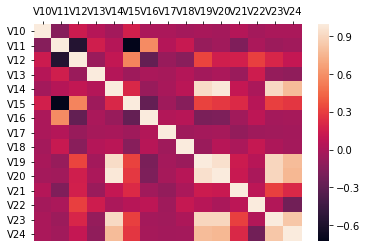

In [99]:
sns.heatmap(corrmat, vmax=1., square=False).xaxis.tick_top()

### Better visualization of the input paramters vs Price Performance in HPE data is below

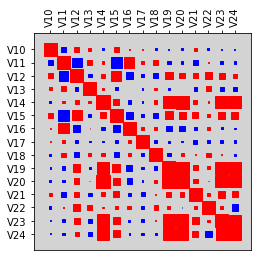

In [100]:
# adapted from http://matplotlib.org/examples/specialty_plots/hinton_demo.html
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('lightgray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'red' if w > 0 else 'blue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

Above we see red color for positive correlations and blue for negative correlations. So we have most correlated input paramters correlated to pp are as below in a descending order:

* V23 - Baseline performance of cpu2017 off course!,

* V14 - Number of DIMMs,

* V19 - No of Cores,

* V20 - No of Chips,


     V21 - Enabled Threads Per Core
     V15 - DIMM Size in GB
     V12 - L3 cache size in KB


The function mosthighlycorrelated() will print out the linear correlation coefficients for each pair of variables in the data set, in order of the correlation coefficient. This lets you see very easily which pair of variables are most highly correlated.

### Function to find top n correlations

In [101]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = mydataframe.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)

In [102]:
mosthighlycorrelated(hpeData, 15)

,FirstVariable,SecondVariable,Correlation
0,V14,V20,0.984636
1,V19,V20,0.952036
2,V14,V19,0.931925
3,V14,V23,0.917320
4,V20,V23,0.900235
5,V19,V23,0.899054
6,V23,V24,0.837379
7,V14,V24,0.788165
8,V19,V24,0.787373
9,V20,V24,0.770046


# Standardising Variables for HPE dataset
If you want to compare different variables that have different units, are very different variances, it is a good idea to first standardise the variables.



For example, we found above that the input paramters (numeric columns other than pp) show a wide range of standard deviations.

As a result, it is not a good idea to use the unstandardised input paramters/independent variables as the input for a principal component analysis (PCA, see below) of the hpedataset, as if you did that, the first principal component would be dominated by the variables which show the largest variances.

Thus, it would be a better idea to first standardise the variables so that they all have variance 1 and mean 0, and to then carry out the principal component analysis on the standardised data. This would allow us to find the principal components that provide the best low-dimensional representation of the variation in the original data, without being overly biased by those variables that show the most variance in the original data.

standardise variables can be done by using the scale() function from the package sklearn.preprocessing.

For example, to standardise the independent variables/input paramters in the hpe dataset , we type: 

In [103]:
standardisedH = scale(hpeData)
standardisedH = pd.DataFrame(standardisedH, index=hpeData.index, columns=hpeData.columns)

In [104]:
standardisedH.apply(np.mean)

V10   -2.282349e-15
V11    7.323389e-16
V12   -3.927584e-17
V13   -3.653431e-16
V14   -1.847131e-18
V15   -1.024186e-16
V16   -1.111001e-15
V17    7.351582e-16
V18    1.322157e-16
V19    4.919202e-17
V20    1.504926e-16
V21    4.991920e-15
V22   -9.507864e-17
V23   -1.028560e-16
V24   -2.945688e-17
dtype: float64

In [105]:
standardisedH.apply(np.std)

V10    1.0
V11    1.0
V12    1.0
V13    1.0
V14    1.0
V15    1.0
V16    1.0
V17    1.0
V18    1.0
V19    1.0
V20    1.0
V21    1.0
V22    1.0
V23    1.0
V24    1.0
dtype: float64

# Principal Component Analysis 

The purpose of principal component analysis is to find the best low-dimensional representation of the variation in a multivariate data set. For example, in the case of the hpe dataset, we have 14 input paramters describing factors affecting price performance (output variable) of the cpu2017 scores for different SKUs.
We can carry out a principal component analysis to investigate whether we can capture most of the variation between samples using a smaller number of new variables (principal components), where each of these new variables is a linear combination of all or some of the 14 input paramters/independant variables.

To carry out a principal component analysis (PCA) on a multivariate data set, the first step is often to standardise the variables under study using the scale() function (see above). This is necessary if the input variables have very different variances, which is true in this case. Once you have standardised 
your variables, you can carry out a principal component analysis using the PCA class from sklearn.decomposition package and its fit method, which fits the model with the data. The default solver is Singular Value Decomposition ("svd"). 

For example, to standardise the 14 input paramters including the pp (output variable), in the HPE dataset, and carry out a principal components analysis on the standardised independent /dependent variables, we type:

In [106]:
pca = PCA().fit(standardisedH)

You can get a summary of the principal component analysis results using the pca_summary() function below, which simulates the output of above function on a PCA model for the dataset:

In [107]:
def pca_summary(pca, standardised_data, out=True):
    names = ["PC"+str(i) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    a = list(np.std(pca.transform(standardised_data), axis=0))
    b = list(pca.explained_variance_ratio_)
    c = [np.sum(pca.explained_variance_ratio_[:i]) for i in range(1, len(pca.explained_variance_ratio_)+1)]
    columns = pd.MultiIndex.from_tuples([("sdev", "Standard deviation"), ("varprop", "Proportion of Variance"), ("cumprop", "Cumulative Proportion")])
    summary = pd.DataFrame(zip(a, b, c), index=names, columns=columns)
    if out:
        print("Importance of components:")
        display(summary)
    return summary

In [108]:
summary = pca_summary(pca, standardisedH)

Importance of components:


,sdev,varprop,cumprop
,Standard deviation,Proportion of Variance,Cumulative Proportion
PC1,2.193108,0.320648,0.320648
PC2,1.577246,0.165847,0.486495
PC3,1.154681,0.088886,0.575381
PC4,1.048848,0.073339,0.648720
PC5,1.024026,0.069909,0.718628
PC6,0.995736,0.066099,0.784728
PC7,0.967242,0.062370,0.847098
PC8,0.917606,0.056133,0.903232
PC9,0.783207,0.040894,0.944126


This gives us the standard deviation of each component, and the proportion of variance explained by each component.
The total variance explained by the components is the sum of the variances of the components:

In [109]:
np.sum(summary.sdev**2)

Standard deviation    15.0
dtype: float64

# Deciding How Many Principal Components to Retain - Independent variables (IV)

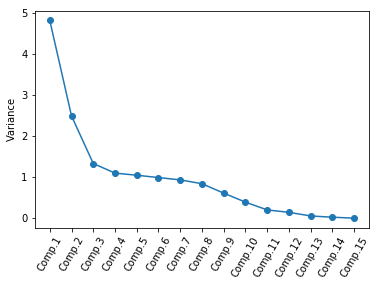

In [110]:
def screeplot(pca, standardised_values):
    y = np.std(pca.transform(standardised_values), axis=0)**2
    x = np.arange(len(y)) + 1
    plt.plot(x, y, "o-")
    plt.xticks(x, ["Comp."+str(i) for i in x], rotation=60)
    plt.ylabel("Variance")
    plt.show()

screeplot(pca, standardisedH)

The most obvious change in slope in the screen plot occurs at component 3, which is the "elbow" of the screen plot. Therefore, it cound be argued based on the basis of the screen plot that the first three components should be retained.

Another way of deciding how many components to retain is to use Kaiser’s criterion: that we should only retain principal components for which the variance is above 1 (when principal component analysis was applied to standardised data). We can check this by finding the variance of each of the principal components:

In [111]:
summary.sdev**2

,Standard deviation
PC1,4.809721
PC2,2.487705
PC3,1.333289
PC4,1.100081
PC5,1.048628
PC6,0.991490
PC7,0.935557
PC8,0.842001
PC9,0.613413
PC10,0.394430


# Loadings for the Principal Components - IV
### PC1

In [112]:
pca.components_[0]

array([ 0.01283495, -0.10573522,  0.16236821, -0.0312423 ,  0.42135765,
        0.21474762, -0.09933206, -0.02224206, -0.01343386,  0.43680653,
        0.43003383,  0.12393412,  0.00222562,  0.43062019,  0.38805612])

In [113]:
np.sum(pca.components_[0]**2)

0.9999999999999987

In [114]:
def calcpc(variables, loadings):
    # find the number of samples in the data set and the number of variables
    numsamples, numvariables = variables.shape
    # make a vector to store the component
    pc = np.zeros(numsamples)
    # calculate the value of the component for each sample
    for i in range(numsamples):
        valuei = 0
        for j in range(numvariables):
            valueij = variables.iloc[i, j]
            loadingj = loadings[j]
            valuei = valuei + (valueij * loadingj)
        pc[i] = valuei
    return pc

In [115]:
calcpc(standardisedH, pca.components_[0])

array([ 6.22858825, -0.71380396, -0.96453217, -1.05775665, -0.80393968,
       -0.92916491, -1.1763122 , -1.73094064, -1.15040423, -1.14745322,
       -0.78534885, -0.91356797, -0.59874004, -0.91290361, -0.72669483,
       -0.66344054, -0.60261887, -0.53923145, -1.15843062, -1.02172804,
       -0.97616427, -1.09908988, -1.04048849, -0.85431448, -0.6697451 ,
       -1.10782332, -0.79195868, -0.54570952, -1.01094229, -0.98624801,
       -0.92156152, -1.25762178, -0.86372738, -0.67983146, -0.93092839,
       -0.94168582, -0.87140099, -0.94292252, -0.99506928, -0.94581514,
       -1.08779407, -1.00100279, -1.1650887 , -1.14978349, -1.21193457,
       -1.14839436, -1.13994626, -0.78536865, -0.91234494, -0.59962723,
       -0.89585246, -0.72658127, -0.66305384, -0.58783639, -0.54032167,
       -1.15838852, -1.03523768, -0.96946492, -1.10272526, -1.02663391,
       -0.85459707, -0.66974728, -1.1056687 , -0.79635845, -0.55041618,
       -0.55043335, -1.01103121, -0.98635354, -0.92468087, -1.26

In fact, the values of the first principal component are computed with the following, so we can compare those values to the ones that we calculated, and they should agree:

In [116]:
pca.transform(standardisedH)[:, 0]

array([ 6.22858825, -0.71380396, -0.96453217, -1.05775665, -0.80393968,
       -0.92916491, -1.1763122 , -1.73094064, -1.15040423, -1.14745322,
       -0.78534885, -0.91356797, -0.59874004, -0.91290361, -0.72669483,
       -0.66344054, -0.60261887, -0.53923145, -1.15843062, -1.02172804,
       -0.97616427, -1.09908988, -1.04048849, -0.85431448, -0.6697451 ,
       -1.10782332, -0.79195868, -0.54570952, -1.01094229, -0.98624801,
       -0.92156152, -1.25762178, -0.86372738, -0.67983146, -0.93092839,
       -0.94168582, -0.87140099, -0.94292252, -0.99506928, -0.94581514,
       -1.08779407, -1.00100279, -1.1650887 , -1.14978349, -1.21193457,
       -1.14839436, -1.13994626, -0.78536865, -0.91234494, -0.59962723,
       -0.89585246, -0.72658127, -0.66305384, -0.58783639, -0.54032167,
       -1.15838852, -1.03523768, -0.96946492, -1.10272526, -1.02663391,
       -0.85459707, -0.66974728, -1.1056687 , -0.79635845, -0.55041618,
       -0.55043335, -1.01103121, -0.98635354, -0.92468087, -1.26

# PC2:

In [117]:
pca.components_[1]

array([ 0.15129779, -0.5610386 ,  0.43887718, -0.07633978, -0.19935498,
        0.43995194, -0.35384093, -0.05148449, -0.14001156, -0.07327942,
       -0.13884675,  0.12494711,  0.08853252, -0.12085302, -0.14297826])

In [118]:
np.sum(pca.components_[1]**2)

0.9999999999999988

# PC3

In [119]:
pca.components_[2]

array([-0.03593716, -0.12687907, -0.24406244, -0.41196859, -0.04484256,
        0.00259917, -0.17583668,  0.19381806, -0.31518162, -0.03647634,
       -0.01848526, -0.12339047, -0.73031279, -0.03262172,  0.17934939])

In [120]:
np.sum(pca.components_[2]**2)

1.0000000000000002

# PC4

In [121]:
pca.components_[3]

array([-0.0554664 , -0.04285838,  0.01430601,  0.48763476,  0.11374736,
       -0.02674837, -0.35963966,  0.39920225, -0.10828464,  0.11294007,
        0.12812511, -0.62371155,  0.03665363, -0.10632101, -0.11034695])

In [122]:
np.sum(pca.components_[3]**2)

1.0000000000000002

# PC5

In [123]:
pca.components_[4]

array([ 0.68467834,  0.11765776,  0.07715619,  0.12257972, -0.01373536,
        0.10872062,  0.42738212,  0.37298432, -0.38916819,  0.00158224,
       -0.0555548 ,  0.05453609,  0.0195124 ,  0.04314474,  0.05342882])

In [124]:
np.sum(pca.components_[4]**2)

0.9999999999999987

# PC6

In [132]:
pca.components_[5]

array([ 0.5405068 , -0.05269899, -0.19681005,  0.38150817,  0.03456286,
        0.01248599, -0.18823071, -0.47790674,  0.3290588 , -0.05638684,
        0.03537759, -0.02650861, -0.3695132 , -0.04676801,  0.05895491])

In [135]:
np.sum(pca.components_[5]**2)

1.0000000000000002

# PC7

In [134]:
pca.components_[6]

array([ 0.20919752, -0.11417671, -0.0412592 , -0.27011341,  0.01447224,
        0.01800194, -0.05700902,  0.569241  ,  0.73062209, -0.06079777,
        0.02468113,  0.0443228 ,  0.01517199,  0.01449057, -0.01409978])

In [136]:
np.sum(pca.components_[6])

1.0827453888851675

# PC8

In [137]:
pca.components_[7]

array([-0.23909373, -0.02897482, -0.19605509,  0.51118851, -0.03656893,
        0.02103465, -0.16443679,  0.32570455, -0.06907554, -0.09085511,
       -0.03731641,  0.6845242 , -0.15204692,  0.02080744,  0.02824007])

In [138]:
np.sum(pca.components_[7])

0.5770760914336592

# PC9

In [139]:
pca.components_[8]

array([ 0.32640106,  0.1434359 , -0.04554408, -0.24587356,  0.0347504 ,
       -0.54403674, -0.55147606,  0.00293686, -0.21299621,  0.11616037,
        0.08339383,  0.2349605 ,  0.2455085 ,  0.00834508, -0.16636324])

In [140]:
np.sum(pca.components_[8])

-0.5703973823593795

## Scatterplots of the Principal Components - SKU (IV)

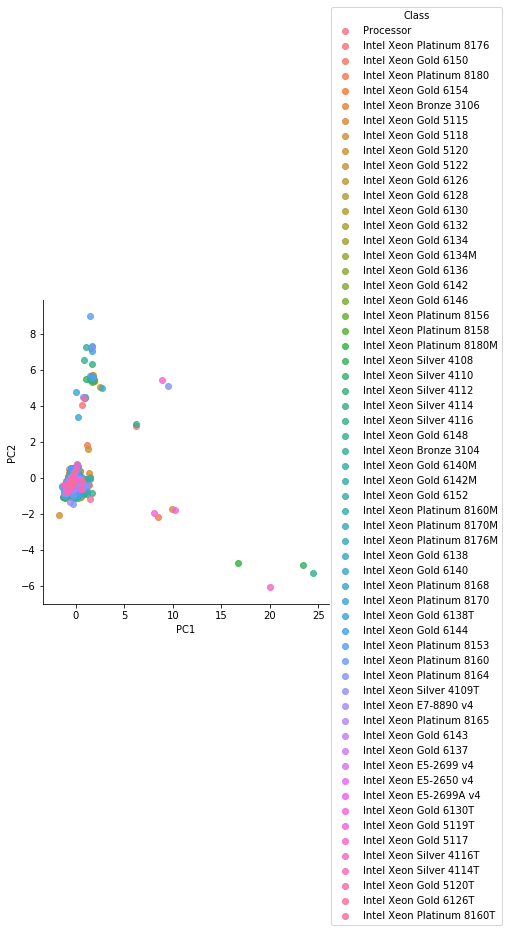

In [125]:
def pca_scatter(pca, standardised_values, classifs):
    foo = pca.transform(standardised_values)
    bar = pd.DataFrame(zip(foo[:, 0], foo[:, 1], classifs), columns=["PC1", "PC2", "Class"])
    sns.lmplot("PC1", "PC2", bar, hue="Class", fit_reg=False)

pca_scatter(pca, standardisedH, y)

# Principal Components Correlation

In [126]:
iv_pc1 =pca.components_[0]
iv_pc2 =pca.components_[1]
iv_pc3 =pca.components_[2]
iv_pc4 =pca.components_[3]
iv_pc5 =pca.components_[4]
iv_pc6 =pca.components_[5]
iv_pc7 =pca.components_[6]
iv_pc8 =pca.components_[7]
iv_pc9 =pca.components_[8]
iv_pc10 =pca.components_[9]

In [145]:
pcData = pd.DataFrame(np.hstack((iv_pc1[:,None], iv_pc2[:,None], iv_pc3[:,None],iv_pc4[:,None], iv_pc5[:,None], iv_pc6[:,None], iv_pc7[:,None],iv_pc8[:,None],iv_pc9[:,None])))

In [146]:
pcData

,0,1,2,3,4,5,6,7,8
0,0.012835,0.151298,-0.035937,-0.055466,0.684678,0.540507,0.209198,-0.239094,0.326401
1,-0.105735,-0.561039,-0.126879,-0.042858,0.117658,-0.052699,-0.114177,-0.028975,0.143436
2,0.162368,0.438877,-0.244062,0.014306,0.077156,-0.196810,-0.041259,-0.196055,-0.045544
3,-0.031242,-0.076340,-0.411969,0.487635,0.122580,0.381508,-0.270113,0.511189,-0.245874
4,0.421358,-0.199355,-0.044843,0.113747,-0.013735,0.034563,0.014472,-0.036569,0.034750
5,0.214748,0.439952,0.002599,-0.026748,0.108721,0.012486,0.018002,0.021035,-0.544037
6,-0.099332,-0.353841,-0.175837,-0.359640,0.427382,-0.188231,-0.057009,-0.164437,-0.551476
7,-0.022242,-0.051484,0.193818,0.399202,0.372984,-0.477907,0.569241,0.325705,0.002937
8,-0.013434,-0.140012,-0.315182,-0.108285,-0.389168,0.329059,0.730622,-0.069076,-0.212996
9,0.436807,-0.073279,-0.036476,0.112940,0.001582,-0.056387,-0.060798,-0.090855,0.116160


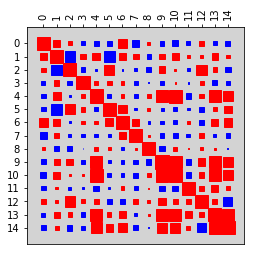

In [164]:
pc_corrmat = pcData.T.corr()
hinton(pc_corrmat)

From above correlation matrix, the V14 (price_performance) is most correlated to below input paramters and hence we choose them as features which are positively correlated. Red color - positively correlated and blue - negatively correlated.

* V13 : BaseResults/cpu2017 Baseline Score but since this is obvious we discard this--------- cannot be a input paramter
* V14 : pp itself so we discard it -----------
#
#
* V10 : NUMB OF CHIPS
* V9  : NUMB OF CORES
* V4  : NUMB OF DIMMs
* V5  : DIMM SIZE
* V6  : DIMM DATA RATE


# Prediction model from the feature extraction technicue above using pca-svd

In [165]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

### From the correlation matrix of the principal component we have below features selected
* V10 : NUMB OF CHIPS
* V9  : NUMB OF CORES
* V4  : NUMB OF DIMMs
* V5  : DIMM SIZE
* V6  : DIMM DATA RATE

In [166]:
features =['#_Chips','#_Cores','No_of_dimms','Dimm_Size_in_GB','Dimm_Data_Rate']

# Specify the Prediction Target i.e. which sku has got the best price performance

In [167]:
target = ['Price_Performance']

In [186]:
data.columns =['Benchmark','Hardware Vendor\t','System','Processor','Compiler','Parallelization','Operating System','File System','Dimm Rank','L1 in KB','L2 in KB','L3 in KB','Memory_in_GB','No_of_dimms','Dimm_Size_in_GB','Dimm_Data_Rate','dimm_speed','Processor_MHz','#_Cores','#_Chips','#Enabled_Threads_Per_Core','SKU_Cost(Pr)','Base_Result','Price_Performance','norm']

In [194]:
data=data[1:]

In [195]:
X =data[features]

In [196]:
Y=data[target]

In [197]:
X

,#_Chips,#_Cores,No_of_dimms,Dimm_Size_in_GB,Dimm_Data_Rate
1,2,56,24,16,2666
2,2,36,24,32,2666
3,2,56,12,32,2666
4,2,36,12,32,2666
5,2,16,24,16,2666
6,2,20,24,16,2666
7,2,24,24,16,2666
8,2,28,24,16,2666
9,2,28,24,16,2666
10,2,8,24,16,2666


In [198]:
Y

,Price_Performance
1,1.97536
2,4.24199
3,2.54354
4,1.23756
5,0.56987
6,0.75835
7,1.07294
8,0.60556
9,1.32302
10,1.29531


# Split the Dataset into Training and Test Datasets

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=324)

# (1) Linear Regression: Fit a model to the training set 

In [201]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Perform Prediction using Linear Regression Model

In [202]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[34.23672398],
       [23.97064916],
       [70.62640573],
       ...,
       [37.37738433],
       [19.78310203],
       [42.11596783]])

# What is the mean of the expected target value in test set ? 

In [203]:
y_test.describe()

,Price_Performance
count,1044
unique,1039
top,36.89912
freq,2


# Evaluate Linear Regression Accuracy using Root Mean Square Error 

In [204]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [205]:
print(RMSE)

65.5298908139


# (2) Decision Tree Regressor: Fit a new regression model to the training set 

In [206]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

# Perform Prediction using Decision Tree Regressor 

In [207]:
y_prediction = regressor.predict(X_test)
y_prediction

array([49.93265014, 33.79400396, 36.81564625, ..., 37.39949174,
       22.21981509, 22.81806556])

# For comparision: What is the mean of the expected target value in test set ? 

In [208]:
y_test.describe()

,Price_Performance
count,1044
unique,1039
top,36.89912
freq,2


# Evaluate Decision Tree Regression Accuracy using Root Mean Square Error 

In [209]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [210]:
print(RMSE)

83.0282640822
